# Loan Repayment Rate

### 1.1 Background

The organization operates on Pay as you go basis on higher purchase. Once a customer acquires a device in form of a loan, their loan repayment rate is tracked. This will enable the organization to follow up on the loan and inform on whether the customer will be eligible for another form of loan in the future. 

### 1.2 Objectives
The objective of this analysis is to:
*  Check the performance of different phone/solar models in terms of loan repayment rates.
*  Find out if the environment/region affect the loan repayment rates of the customers.
*  Find out if the age and gender of the customer affect their ability to repay their loan.
*  Check the loan status of the customer against the different phone models to find out the models whose loans were     cancelled by the customers.


_See below a snippet of my dataset;_
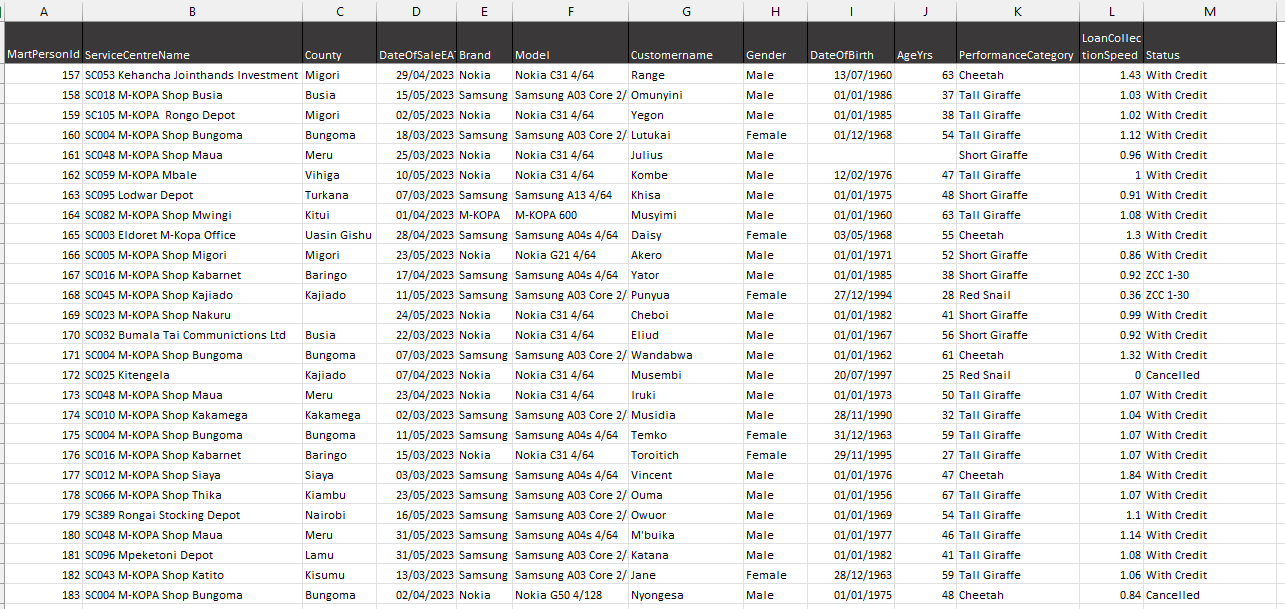

### 1.3 Overview

In [42]:
import numpy as np
import pandas as pd
Data = pd.read_excel(r'C:\Users\hilda.kiptoo\LoanStatusData.xlsx')
print(Data.head())

   MartPersonId                     ServiceCentreName    County DateOfSaleEAT  \
0           157  SC053 Kehancha Jointhands Investment    Migori    2023-04-29   
1           158               SC018 M-KOPA Shop Busia    Busia     2023-05-15   
2           159             SC105 M-KOPA  Rongo Depot    Migori    2023-05-02   
3           160             SC004 M-KOPA Shop Bungoma  Bungoma     2023-03-18   
4           161                SC048 M-KOPA Shop Maua      Meru    2023-03-25   

     Brand                  Model Customername  Gender DateOfBirth  AgeYrs  \
0    Nokia         Nokia C31 4/64        Range    Male  1960-07-13    63.0   
1  Samsung  Samsung A03 Core 2/32     Omunyini    Male  1986-01-01    37.0   
2    Nokia         Nokia C31 4/64        Yegon    Male  1985-01-01    38.0   
3  Samsung  Samsung A03 Core 2/32      Lutukai  Female  1968-12-01    54.0   
4    Nokia         Nokia C31 4/64       Julius    Male         NaT     NaN   

  PerformanceCategory  LoanCollectionSpeed  

In [43]:
print(Data.describe())

       MartPersonId                  DateOfSaleEAT  \
count   9830.000000                           9830   
mean    5071.500000  2023-04-14 19:38:39.674466048   
min      157.000000            2023-03-01 00:00:00   
25%     2614.250000            2023-04-07 00:00:00   
50%     5071.500000            2023-04-15 00:00:00   
75%     7528.750000            2023-04-25 00:00:00   
max     9986.000000            2023-06-01 00:00:00   
std     2837.820907                            NaN   

                         DateOfBirth       AgeYrs  LoanCollectionSpeed  
count                           9828  9828.000000          9830.000000  
mean   1988-05-20 18:44:41.318681344    34.651201             1.069457  
min              1900-01-01 00:00:00     3.000000             0.000000  
25%              1981-04-06 06:00:00    25.000000             0.870000  
50%              1990-06-05 00:00:00    33.000000             1.030000  
75%              1998-01-23 06:00:00    42.000000             1.090000  
ma

In [44]:
print(Data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9830 entries, 0 to 9829
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   MartPersonId         9830 non-null   int64         
 1   ServiceCentreName    9830 non-null   object        
 2   County               8811 non-null   object        
 3   DateOfSaleEAT        9830 non-null   datetime64[ns]
 4   Brand                9830 non-null   object        
 5   Model                9830 non-null   object        
 6   Customername         9830 non-null   object        
 7   Gender               9830 non-null   object        
 8   DateOfBirth          9828 non-null   datetime64[ns]
 9   AgeYrs               9828 non-null   float64       
 10  PerformanceCategory  9830 non-null   object        
 11  LoanCollectionSpeed  9830 non-null   float64       
 12  Status               9830 non-null   object        
dtypes: datetime64[ns](2), float64(2),

###  1.4 Data Cleaning

###### (i) Checking for missing numerical values in customer age(AgeYrs) and replacing with the average.

In [45]:
# Calculate the number of missing values in each row
missing_counts = Data.isnull().sum(axis=1)

# Filter rows with more than one missing value
rows_with_multiple_missing = Data[missing_counts > 1]

print(rows_with_multiple_missing)


      MartPersonId        ServiceCentreName County DateOfSaleEAT    Brand  \
4              161   SC048 M-KOPA Shop Maua   Meru    2023-03-25    Nokia   
3046          3203  SC086 M-KOPA Shop Kitui  Kitui    2023-04-04  Samsung   

                      Model Customername Gender DateOfBirth  AgeYrs  \
4            Nokia C31 4/64       Julius   Male         NaT     NaN   
3046  Samsung A03 Core 2/32        Mutie   Male         NaT     NaN   

     PerformanceCategory  LoanCollectionSpeed       Status  
4          Short Giraffe                 0.96  With Credit  
3046             Cheetah                 1.33  With Credit  


In [6]:
## Is it duplicate to above??

# Dealing with missing values on AgeYrs column
missing_values_age = Data.loc[Data['AgeYrs'].isnull()]
print(missing_values_age)
#Print()
average_value = round(Data['AgeYrs'].mean())
print('Average Age: ', average_value)
print()
Data['AgeYrs'].fillna(average_value, inplace=True)
print(Data)
print()
print(Data['AgeYrs'])

      MartPersonId        ServiceCentreName County DateOfSaleEAT    Brand  \
4              161   SC048 M-KOPA Shop Maua   Meru    2023-03-25    Nokia   
3046          3203  SC086 M-KOPA Shop Kitui  Kitui    2023-04-04  Samsung   

                      Model Customername Gender DateOfBirth  AgeYrs  \
4            Nokia C31 4/64       Julius   Male         NaT     NaN   
3046  Samsung A03 Core 2/32        Mutie   Male         NaT     NaN   

     PerformanceCategory  LoanCollectionSpeed       Status  
4          Short Giraffe                 0.96  With Credit  
3046             Cheetah                 1.33  With Credit  
Average Age:  35

      MartPersonId                     ServiceCentreName    County  \
0              157  SC053 Kehancha Jointhands Investment    Migori   
1              158               SC018 M-KOPA Shop Busia    Busia    
2              159             SC105 M-KOPA  Rongo Depot    Migori   
3              160             SC004 M-KOPA Shop Bungoma  Bungoma    
4  

##### (ii) Dropping outliers in the AgeYrs  column

In [46]:
# Filtering out rows with age below 18 or above 110
filtered_data = Data[(Data['AgeYrs'] >= 18) & (Data['AgeYrs'] <= 110)]

# Printing the rows with ages considered outliers (below 18 or above 110)
outliers = Data[(Data['AgeYrs'] < 18) | (Data['AgeYrs'] > 110)]
print("Outliers (rows with age below 18 or above 110):\n", outliers)

# Deleting rows with ages considered outliers
LoanStatusData = Data.drop(index=outliers.index)
print(LoanStatusData)

Outliers (rows with age below 18 or above 110):
       MartPersonId        ServiceCentreName        County DateOfSaleEAT  \
1697          1854  SC015 M-KOPA Shop Bondo         Siaya    2023-04-16   
1767          1924     SC130 Kilgoris Depot         Narok    2023-05-11   
2649          2806   SC093 Loita Street CBD       Nairobi    2023-05-26   
3853          4010       SC136 Taveta Depot  Taita-Taveta    2023-04-13   
8830          8987  SC012 M-KOPA Shop Siaya         Siaya    2023-04-25   

        Brand                  Model Customername  Gender DateOfBirth  AgeYrs  \
1697  Samsung  Samsung A03 Core 2/32        Omolo  Female  1900-01-01   123.0   
1767  Samsung  Samsung A03 Core 2/32      Masarie    Male  2019-09-09     3.0   
2649  Samsung       Samsung A13 4/64       Mwangi    Male  1900-01-01   123.0   
3853  Samsung  Samsung A03 Core 2/32       Bilbay    Male  1900-02-12   123.0   
8830  Samsung  Samsung A03 Core 2/32         Tito    Male  1900-01-01   123.0   

     Performa

## 1. Checking the performance of different phone/solar models in terms of loan repayment rates.

###### a. Cleaning the Data

In [47]:
# Dropping rows with missing values in relevant columns
LoanStatusData.dropna(subset=['Model', 'LoanCollectionSpeed'], inplace=True)

# Converting LoanCollectionSpeed to numeric (if it's not already)
LoanStatusData['LoanCollectionSpeed'] = pd.to_numeric(LoanStatusData['LoanCollectionSpeed'])

###### b. Grouping

In [9]:
# Grouping data by Model and calculate the mean loan repayment rate for each model
model_repayment_rates = LoanStatusData.groupby('Model')['LoanCollectionSpeed'].mean()
print(model_repayment_rates)

Model
M-KOPA 600               4.311619
M-KOPA 6000              0.990426
Nokia C21 3/32           0.576667
Nokia C30 2/32           0.850000
Nokia C31 4/64           0.987428
Nokia G21 4/64           1.063987
Nokia G50 4/128          0.761132
Samsung A03 3/32         1.144571
Samsung A03 4/64         0.945714
Samsung A03 Core 2/32    0.977998
Samsung A04s 4/128       1.088235
Samsung A04s 4/64        1.052549
Samsung A13 4/64         1.031295
Samsung A23 4/128        1.032000
Samsung A23 4/64         1.187025
Samsung A53 6/128        1.235000
Name: LoanCollectionSpeed, dtype: float64


###### c. Displaying the findings

In [26]:
# Creating a DataFrame from the model_repayment_rates Series
model_repayment_df = model_repayment_rates.reset_index(name='model_repayment_rates')

# Creating a pivot table to show Model against model_repayment_rates
pivot_table = pd.pivot_table(model_repayment_df, values='model_repayment_rates', index='Model')

# Sorting the pivot table by model_repayment_rates in descending order (highest to lowest)
sorted_pivot_table = pivot_table.sort_values(by='model_repayment_rates', ascending=False)

# Comparing the model_repayment_rates and  counts per model 
devices_per_model = LoanStatusData.groupby('Model')['MartPersonId'].count().reset_index()
devices_per_model.rename(columns={'MartPersonId': 'DeviceCount'}, inplace=True)

# Merging the sorted_pivot_table and devices_per_model DataFrames on the 'Model' column
result = pd.merge(sorted_pivot_table, devices_per_model, on='Model')

# Printing the result with Model, model_repayment_rates, and DeviceCount columns
print('Comparison of Model Repayment Rates and Device Counts by Model')
print(result)

Comparison of Model Repayment Rates and Device Counts by Model
                    Model  model_repayment_rates  DeviceCount
0              M-KOPA 600               4.311619          203
1       Samsung A53 6/128               1.235000            2
2        Samsung A23 4/64               1.187025          225
3        Samsung A03 3/32               1.144571           35
4      Samsung A04s 4/128               1.088235           17
5          Nokia G21 4/64               1.063987          278
6       Samsung A04s 4/64               1.052549          764
7       Samsung A23 4/128               1.032000            5
8        Samsung A13 4/64               1.031295          418
9             M-KOPA 6000               0.990426          128
10         Nokia C31 4/64               0.987428         3375
11  Samsung A03 Core 2/32               0.977998         3274
12       Samsung A03 4/64               0.945714           28
13         Nokia C30 2/32               0.850000            2
14     

##### d. Correlation

In [30]:
# Calculating the Spearman correlation coefficient
correlation = result['model_repayment_rates'].corr(result['DeviceCount'], method='spearman')

# Printing the correlation coefficient
print('Spearman Correlation between Repayment Rates and Device Counts:', correlation)

# Interpreting the correlation
if correlation > 0:
    print('There is a positive correlation between higher repayment rates and higher device counts.This means that when repayment rates are higher, there is a tendency for device counts to be higher as well.')
elif correlation < 0:
    print('There is a negative correlation between higher repayment rates and higher device counts.')
else:
    print('There is no significant correlation between repayment rates and device counts.')

Spearman Correlation between Repayment Rates and Device Counts: 0.09734555627678164
There is a positive correlation between higher repayment rates and higher device counts.This means that when repayment rates are higher, there is a tendency for device counts to be higher as well.


###### e. Visualization - Barplot

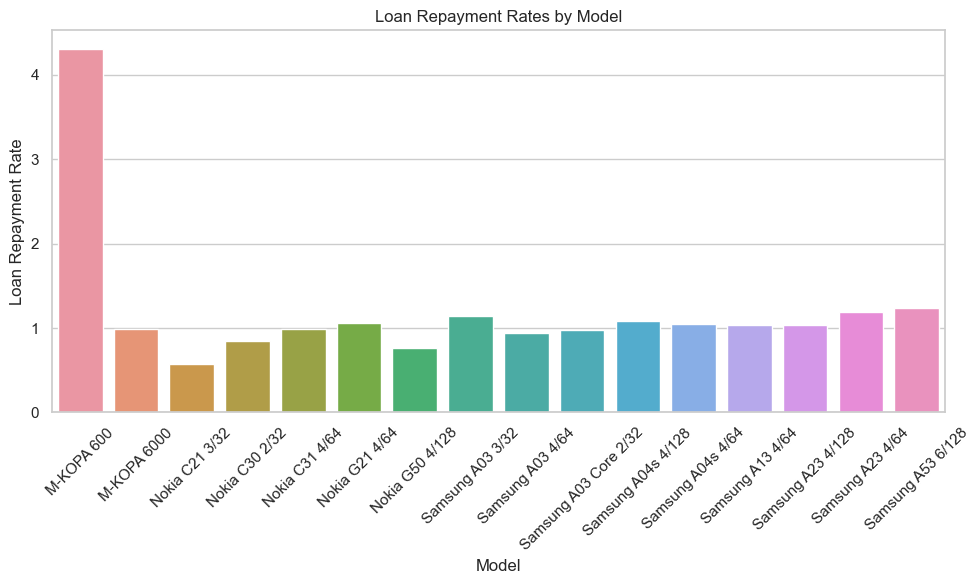

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a seaborn style
sns.set(style="whitegrid")

# Creating a bar plot to visualize loan repayment rates for different models
plt.figure(figsize=(10, 6))
sns.barplot(x=model_repayment_rates.index, y=model_repayment_rates.values)
plt.title('Loan Repayment Rates by Model')
plt.xlabel('Model')
plt.ylabel('Loan Repayment Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

######  f. Findings

* The model "M-KOPA 600" has the highest model repayment rate of approximately 4.31, indicating a strong trend of timely loan repayment.

* Some models have very low device counts, like "Nokia C30 2/32", "Samsung A53 6/128" and "Nokia C21 3/32," due to their recent introduction to the market at the time this data was collected.

* The positive correlation suggests that as repayment rates increase, device counts also tend to increase. 

## 2.   Finding out if the age and gender of the customer affect their ability to repay their loan.

###### a. Cleaning the Data

In [14]:
# Dropping rows with missing AgeYrs or Gender values
LoanStatusData.dropna(subset=['AgeYrs', 'Gender', 'LoanCollectionSpeed'], inplace=True)

###### b. Descritization of Data

In [15]:
# Defining age groups and labels
age_bins = [18, 24, 30, 40, 50, 60, 95]
age_labels = ['18-24', '25-30', '31-40', '41-50', '51-60', '61+']

# Creating a new column 'AgeGroup' based on AgeYrs and age bins
LoanStatusData['AgeGroup'] = pd.cut(LoanStatusData['AgeYrs'], bins=age_bins, labels=age_labels, include_lowest=True)

###### c. Grouping and Aggregating

In [16]:
# Grouping data by AgeGroup and Gender and calculate mean loan repayment rate for each group
grouped_data = LoanStatusData.groupby(['AgeGroup', 'Gender'])['LoanCollectionSpeed'].mean().reset_index()
print(grouped_data)

   AgeGroup  Gender  LoanCollectionSpeed
0     18-24  Female             0.959880
1     18-24    Male             0.924822
2     25-30  Female             0.971938
3     25-30    Male             0.972516
4     31-40  Female             1.616410
5     31-40    Male             1.016202
6     41-50  Female             1.013106
7     41-50    Male             1.065442
8     51-60  Female             1.085000
9     51-60    Male             1.110021
10      61+  Female             1.004528
11      61+    Male             1.067488


###### d. Visualization

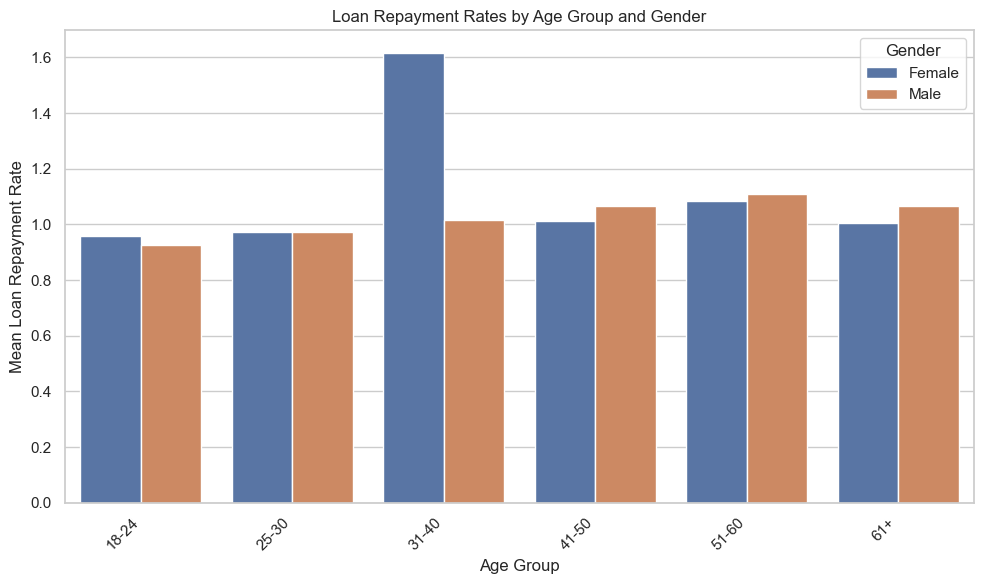

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a bar plot to visualize the relationship between AgeGroup, Gender, and LoanCollectionSpeed
plt.figure(figsize=(10, 6))
sns.barplot(x='AgeGroup', y='LoanCollectionSpeed', hue='Gender', data=grouped_data)
plt.title('Loan Repayment Rates by Age Group and Gender')
plt.xlabel('Age Group')
plt.ylabel('Mean Loan Repayment Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Gender')
plt.show()

###### e. Findings

* In the 31-40 age group, females have a noticeably higher loan collection speed compared to males. This is because women in this age group have more stable employment and higher income levels compared to men, hence repay loans on time. Also, Women in this age group may have a more established and positive credit history, making them more reliable borrowers, and hence more likely to pay back loans on time.
* The loan collection speed tends to be relatively consistent across most age groups and genders.
* Among seniors (age 61+), there is a slight difference between males and females in loan collection speed, with males having a slightly higher average repayment rate. This is because men in this age group worked in higher-paying or more secure jobs, hence have more financial resources available for loan repayment.

##  3. Check the loan status of the customer against the different phone models to find out the models whose loans were  cancelled by the customers.

###### a. Filtering and grouping

In [18]:
# Filtering rows where the loan status is 'Cancelled'
cancelled_loans = LoanStatusData[LoanStatusData['Status'] == 'Cancelled']
print(cancelled_loans)

# Grouping cancelled loans by model and count the occurrences
cancelled_by_model = cancelled_loans.groupby('Model')['MartPersonId'].count().reset_index()
cancelled_by_model.rename(columns={'MartPersonId': 'CancelledCount'}, inplace=True)

      MartPersonId              ServiceCentreName       County DateOfSaleEAT  \
15             172                SC025 Kitengela      Kajiado    2023-04-07   
26             183      SC004 M-KOPA Shop Bungoma     Bungoma     2023-04-02   
56             213      SC004 M-KOPA Shop Bungoma     Bungoma     2023-03-06   
61             218       SC014 M-KOPA Shop  Narok          NaN    2023-03-18   
80             237      SC004 M-KOPA Shop Bungoma     Bungoma     2023-05-22   
...            ...                            ...          ...           ...   
9643          9800    SC003 Eldoret M-Kopa Office  Uasin Gishu    2023-04-25   
9657          9814      SC045 M-KOPA Shop Kajiado      Kajiado    2023-04-16   
9690          9847  SC081 M-KOPA  Kendu Bay Depot     Homa Bay    2023-04-12   
9744          9901      SC004 M-KOPA Shop Bungoma     Bungoma     2023-04-12   
9792          9949         SC001 M-KOPA Shop Meru         Meru    2023-04-15   

        Brand                  Model Cu

###### b. Sorting and Displaying results

In [48]:
# Sorting the results by CancelledCount in descending order
cancelled_by_model_sorted = cancelled_by_model.sort_values(by='CancelledCount', ascending=False)

# Printing the sorted results
print("Models whose loans were cancelled by customers (sorted by CancelledCount descending):")
print(cancelled_by_model_sorted)

Models whose loans were cancelled by customers (sorted by CancelledCount descending):
                   Model  CancelledCount
5  Samsung A03 Core 2/32              52
2         Nokia C31 4/64              47
6      Samsung A04s 4/64               9
1            M-KOPA 6000               5
7       Samsung A13 4/64               5
0             M-KOPA 600               4
4        Nokia G50 4/128               4
8       Samsung A23 4/64               4
3         Nokia G21 4/64               2


In [49]:
# Group the data by "Model" and calculate the count of cancelled devices per model
grouped = LoanStatusData[LoanStatusData["Status"] == "Cancelled"].groupby("Model").size().reset_index(name="CancelledCount")

# Calculate the total count of devices per model
total_count = LoanStatusData.groupby("Model").size().reset_index(name="TotalCount")

# Merge the two DataFrames to get the count of cancelled devices and total count per model
result = total_count.merge(grouped, on="Model", how="left")

# Fill NaN values with 0 for models with no cancellations
result["CancelledCount"].fillna(0, inplace=True)

# Calculate the percentage of cancelled devices correctly
result["PercentageCancelled"] = (result["CancelledCount"] / result["TotalCount"]) * 100

# Format the PercentageCancelled column to display as a percentage with 2 decimal places
result["PercentageCancelled"] = result["PercentageCancelled"].apply(lambda x: f'{x:.2f}%')

# Display the result DataFrame
print(result)

                    Model  TotalCount  CancelledCount PercentageCancelled
0              M-KOPA 600         210             4.0               1.90%
1             M-KOPA 6000         141             5.0               3.55%
2          Nokia C21 3/32           3             0.0               0.00%
3          Nokia C30 2/32           3             0.0               0.00%
4          Nokia C31 4/64        3772            47.0               1.25%
5          Nokia G21 4/64         306             2.0               0.65%
6         Nokia G50 4/128          53             4.0               7.55%
7        Samsung A03 3/32          35             0.0               0.00%
8        Samsung A03 4/64          28             0.0               0.00%
9   Samsung A03 Core 2/32        3666            52.0               1.42%
10     Samsung A04s 4/128          17             0.0               0.00%
11      Samsung A04s 4/64         871             9.0               1.03%
12       Samsung A13 4/64         471 

Percentage of Cancelled Devices in the Entire Dataset: 1.3435114503816794 %


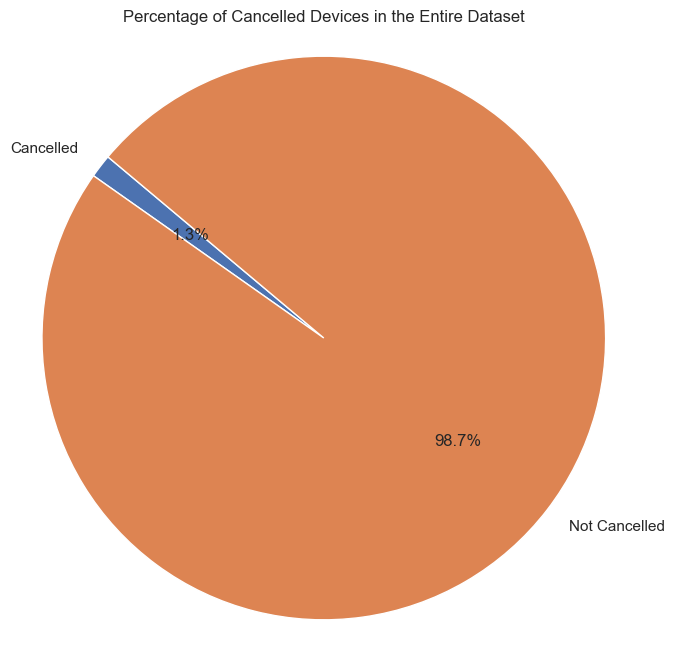

In [51]:
total_count = len(LoanStatusData)

# Calculating the count of cancelled devices in the entire dataset
cancelled_count = len(LoanStatusData[LoanStatusData["Status"] == "Cancelled"])

# Calculating the percentage of cancelled devices in the entire dataset
percentage_cancelled = (cancelled_count / total_count) * 100

# Displaying the percentage of cancelled devices for the entire dataset
print("Percentage of Cancelled Devices in the Entire Dataset:", percentage_cancelled, "%")

## VISUALIZATION
# Creating a pie chart
labels = ['Cancelled', 'Not Cancelled']
sizes = [percentage_cancelled, 100 - percentage_cancelled]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)

# Setting the title
plt.title('Percentage of Cancelled Devices in the Entire Dataset')

# Showing the plot
plt.axis('equal') 
plt.show()

###### c. Visualization

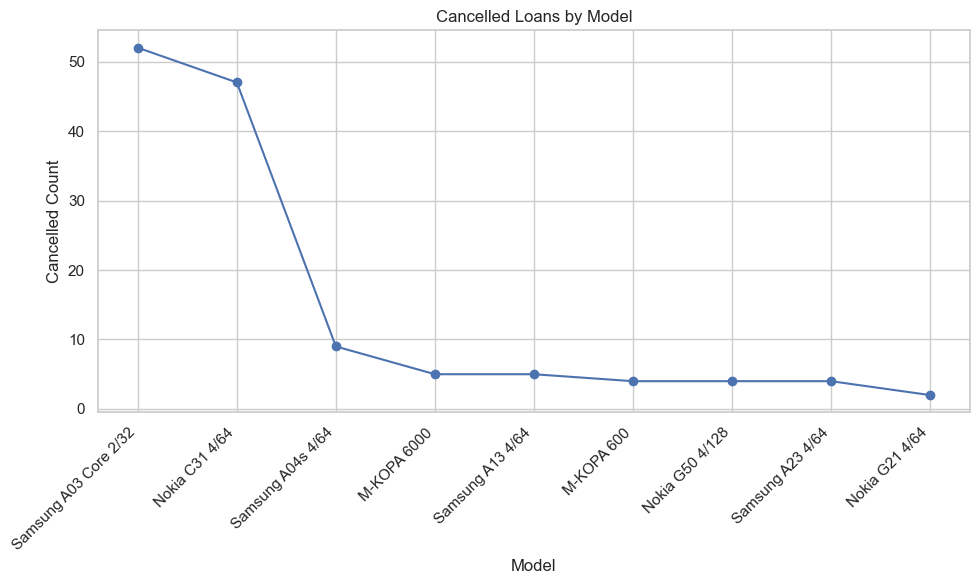

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(cancelled_by_model_sorted['Model'], cancelled_by_model_sorted['CancelledCount'], marker='o')
plt.title('Cancelled Loans by Model')
plt.xlabel('Model')
plt.ylabel('Cancelled Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###### d. Findings

*The analysis revealed that the Samsung A03 Core 2/32 and Nokia C31 4/64 phone models exhibited a notable frequency of cancelled loans by customers. This is mostly contributed by product quality and pricing. For this reason,a product with similar spects should be introduced into the market to compare the performance against these models*

## 4.  Finding out if the environment/region affect the loan repayment rates of the customers.

###### a. Cleaning the data

In [53]:
# Dropping rows with missing values in relevant columns
LoanStatusData.dropna(subset=['County', 'LoanCollectionSpeed'], inplace=True)

# Dropping rows with 'Closed SCs' under ServiceCentreName Column 
values_to_drop = ['Closed SCs']
# Filtering out rows with specified values in the ServiceCentreName column
cleaned_data = LoanStatusData[~LoanStatusData['County'].isin(values_to_drop)]
print(cleaned_data)

      MartPersonId                     ServiceCentreName    County  \
0              157  SC053 Kehancha Jointhands Investment    Migori   
1              158               SC018 M-KOPA Shop Busia    Busia    
2              159             SC105 M-KOPA  Rongo Depot    Migori   
3              160             SC004 M-KOPA Shop Bungoma  Bungoma    
4              161                SC048 M-KOPA Shop Maua      Meru   
...            ...                                   ...       ...   
9825          9982               SC055 M-KOPA Shop Wote    Makueni   
9826          9983           SC079 M-KOPA Shop Loitoktok   Kajiado   
9827          9984                SC093 Loita Street CBD   Nairobi   
9828          9985           SC394 Kiambu Stocking Depot    Kiambu   
9829          9986                  SC080 M-KOPA Kadongo  Homa Bay   

     DateOfSaleEAT    Brand                  Model Customername  Gender  \
0       2023-04-29    Nokia         Nokia C31 4/64        Range    Male   
1       2

###### b. Grouping Data and Displaying results

In [54]:
# Grouping data by County and calculat the mean LoanCollectionSpeed for each group
grouped_data = cleaned_data.groupby('County')['LoanCollectionSpeed'].mean().reset_index()

# Sorting the groups by LoanCollectionSpeed in descending order (highest to lowest)
counties = grouped_data.sort_values(by='LoanCollectionSpeed', ascending=False)

# Printing counties by average LoanCollectionSpeed
print("Counties Ordered by Loan Collection Speed (highest to lowest):")
print(counties)

Counties Ordered by Loan Collection Speed (highest to lowest):
             County  LoanCollectionSpeed
19         Machakos             2.890591
12        Kirinyaga             1.098889
24          Mombasa             1.073900
10           Kiambu             1.063836
7            Isiolo             1.044079
26          Nairobi             1.043013
8           Kajiado             1.028129
30            Nyeri             1.024920
15            Kitui             1.020546
5           Garissa             1.011375
25         Murang'a             1.010935
4              Embu             1.009588
14           Kisumu             1.004231
20          Makueni             1.003439
16            Kwale             1.003197
2            Busia              1.002510
37           Vihiga             0.997514
31            Siaya             0.996702
34      Trans-Nzoia             0.995075
17         Laikipia             0.994658
23           Migori             0.993820
11           Kilifi             0.9

###### c. Visualization

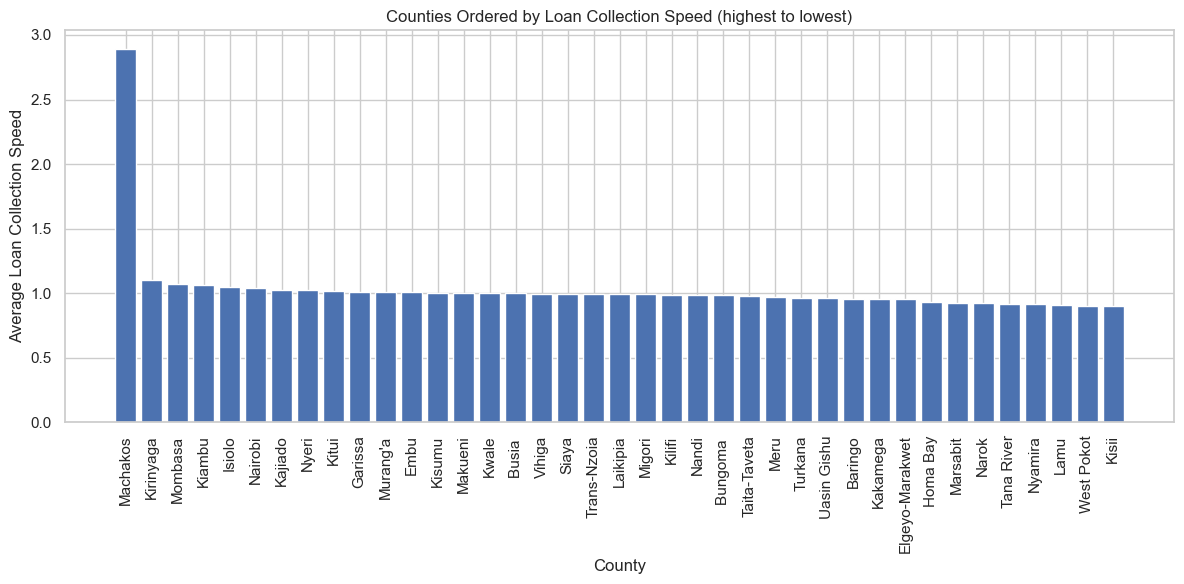

In [55]:
import matplotlib.pyplot as plt

# Setting the size of the figure
plt.figure(figsize=(12, 6))

# Creating the bar chart
plt.bar(counties['County'], counties['LoanCollectionSpeed'])

# Adding labels and title
plt.xlabel('County')
plt.ylabel('Average Loan Collection Speed')
plt.title('Counties Ordered by Loan Collection Speed (highest to lowest)')

# Rotating the x-axis labels for better readability if needed
plt.xticks(rotation=90)

# Show the chart
plt.tight_layout()
plt.show()

###### d. Findings

* There is a considerable variation in loan collection speed across different counties in the dataset.
* Machakos has the highest loan collection speed, significantly higher than other counties. This suggests that customers from Machakos tend to repay their loans promptly.
* Loan collection speed can be influenced by various factors and this can help inform business strategies related to risk assessment, resource allocation, and customer engagement in different counties, e.g., counties with lower loan collection speeds might be targeted for certain promotional offers or campaigns to encourage responsible borrowing and prompt repayment.

## Suggestions

* More payment plan models should be added that favor the slower paying customers in some of the counties in terms of repayment rates. This can be done by ensuring that these plans have higher interest rates and longer repayment periods
* Younger age groups can be given a different repayment model since they are slow payers. This is because they are yet to secure stable jobs to be able to pay for their loans